In [48]:
# libraries
from qiskit.quantum_info import SparsePauliOp, DensityMatrix, Operator
from qiskit import QuantumCircuit
import numpy as np

Observable/Hamiltonian

In [ ]:
# number of qubits
n = 3
Hamiltonian = SparsePauliOp.from_sparse_list(
    [("",[], 1.5), ("Z", [2],-0.5), ("Z", [1],-0.5), ("Z", [0],-0.5)], num_qubits=n
)
print(Hamiltonian)

SparsePauliOp(['III', 'ZII', 'IZI', 'IIZ'],
              coeffs=[ 1.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j])


In [3]:
# the observable in matrix form
hamiltonianMatrix = Hamiltonian.to_matrix()
hamiltonianMatrix

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 3.+0.j]])

In [39]:
#Input state
phi1 =np.array([[1],[0],[0],[0],[0],[0],[0],[0]])
phi1_trans = phi1.transpose()   
phi2 =np.array([[0],[1],[0],[0],[0],[0],[0],[0]])
phi2_trans = phi2.transpose()  
phi3 =np.array([[0],[0],[1],[0],[0],[0],[0],[0]])
phi3_trans = phi3.transpose()   
phi4 = np.array([[0],[0],[0],[0],[1],[0],[0],[0]])
phi4_trans = phi4.transpose() 
phi5 = np.array([[0],[0],[0],[1],[0],[0],[0],[0]])
phi5_trans = phi5.transpose()   
phi6 = np.array([[0],[0],[0],[0],[0],[1],[0],[0]])
phi6_trans = phi6.transpose()  
phi7 = np.array([[0],[0],[0],[0],[0],[0],[1],[0]])
phi7_trans = phi7.transpose()   
phi8 = np.array([[0],[0],[0],[0],[0],[0],[0],[1]])
phi8_trans = phi8.transpose() 
rho1 = (1/3)*(np.matmul(phi1,phi1_trans)+np.matmul(phi1,phi2_trans)+np.matmul(phi1,phi3_trans)+np.matmul(phi2,phi1_trans)+np.matmul(phi2,phi2_trans)+np.matmul(phi2,phi3_trans)+np.matmul(phi3,phi1_trans)+np.matmul(phi3,phi2_trans)+np.matmul(phi3,phi3_trans))
rho2 = (1/3)*(np.matmul(phi4,phi4_trans)-np.matmul(phi4,phi5_trans)+np.matmul(phi4,phi6_trans)-np.matmul(phi5,phi4_trans)+np.matmul(phi5,phi5_trans)-np.matmul(phi5,phi6_trans)+np.matmul(phi6,phi4_trans)-np.matmul(phi6,phi5_trans)+np.matmul(phi6,phi6_trans))
rho3 = (1/2)*(np.matmul(phi7,phi7_trans)+np.matmul(phi8,phi8_trans))
rho_n1 = (1/3)*(rho1+rho2+rho3)

# rho_n1
rho_n1 = DensityMatrix(rho_n1)

In [47]:
# Purification of the density matrix

# Diagonalize the matrix
rho_eig_val, rho_eig_vec = np.linalg.eigh(rho_n1)

p_vec = np.concatenate((np.sqrt(rho_eig_val), np.sqrt(rho_eig_val), np.sqrt(rho_eig_val), np.sqrt(rho_eig_val), np.sqrt(rho_eig_val), np.sqrt(rho_eig_val), np.sqrt(rho_eig_val), np.sqrt(rho_eig_val) ), axis=0)

# print(eigenvectors.shape)
U_vec = rho_eig_vec.reshape((64))
psi = p_vec * U_vec
print(psi.shape)
print('The purified state is \n', psi)
rho_partial_trace = np.dot(psi.reshape((8,8)),psi.reshape((8,8)).transpose())
print('Verify the reduction to the original mixed state \n', rho_partial_trace)

(64,)
The purified state is 
 [-1.45332012e-10+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
 -6.08163734e-09+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  3.33333333e-01+0.j  0.00000000e+00+0.j  2.69468376e-09+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  2.78800099e-09+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  3.33333333e-01+0.j
  0.00000000e+00+0.j -2.54935175e-09+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  3.29363635e-09+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  3.33333333e-01+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j -1.45332012e-10+0.j -6.08163734e-09+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  3.33333333e-01+0.j  0.00000000e+00+0.j
 -2.69468376e-09+0.j -2.78800099e-09+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
 -3.33333333e-01+0.j  0.00000000e+00+0.j  2.54935175e-09+0.j
 -3.29363635e-09+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j -3.33333333e-0

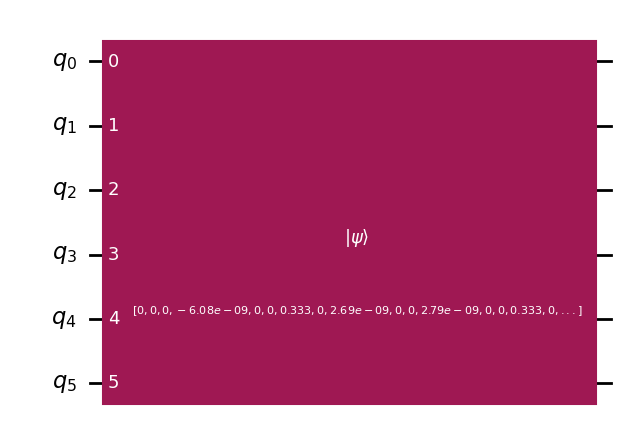

In [54]:
qc = QuantumCircuit(6)
qc.initialize(psi, [0,1,2,3,4,5])
qc.draw('mpl')

In [ ]:
# measurement
''' since we only measure in Pauli Z basis, to measure the hamiltonian,
    we need to change the basis, into the eigenbasis of Hamiltonian.
    '''

> But can all valid observables be measured in practice? The answer to this depends on the quantum system under consideration. In this tutorial, the system under consideration is an IBM quantum processor. And in these processors only measurements onto the computational basis are supported natively. Measurements to other basis states can be performed by applying an appropriate unitary transformation before measurement. Suppose that the hardware only lets us do measurements onto the computational basis {$\ket i$} but we want to perform a measurement onto the basis set {$\ket{\Phi_i}$}. This problem can be solved if we can implement the following unitary transformation, $U = \sum_i \ket i \bra{\Phi_i}$

Refer to https://arxiv.org/pdf/1804.03719 pp. 10

In [73]:
# change of basis into the eigenbasis of Hamiltonian

dim = 8
standard_basis_vectors = [np.eye(dim)[:, i] for i in range(dim)]

phi_states = [eigenvectors[:, i] for i in range(eigenvectors.shape[1])]

U_basis_change = sum(np.outer(basis_vectors[i], phi_states[i].conj()) for i in range(dim))

# U_basis_change

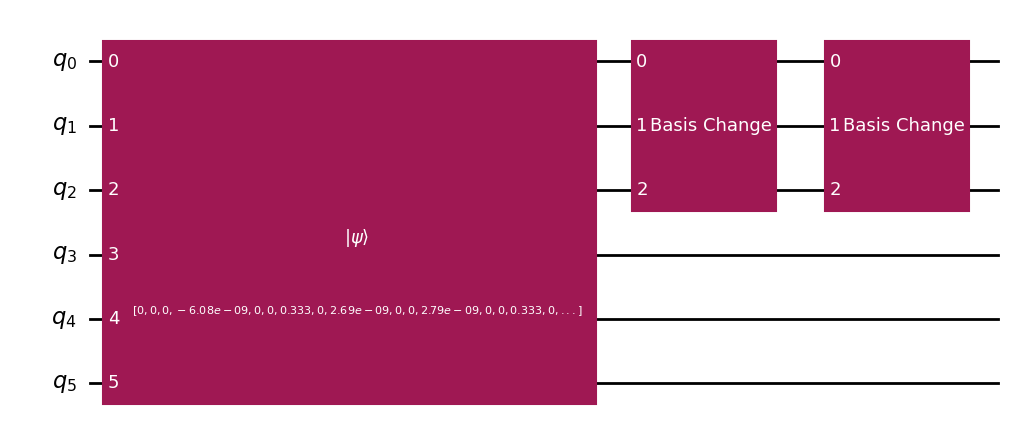

In [ ]:
'''
implement U_basis_change
Comment:  Not sure, if this is implementable in IBM. Need to specify universal gates.

'''
U_basis_change_op = Operator(U_basis_change)

qc.unitary(U_basis_change_op, [0,1,2], label="Basis Change")
qc.draw('mpl')